# Import functions

<font color='blue'>RSXS 101 from Padraic Shafer (ALS) can be found at:</font>
https://anl.box.com/s/awyic3ykmn8twjjh7cumv259p4e0ys9g (recording to come)

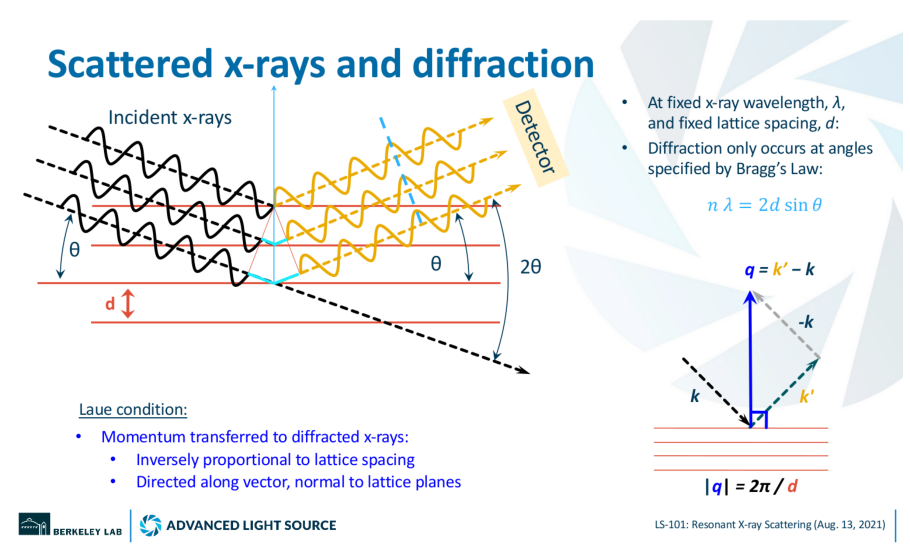

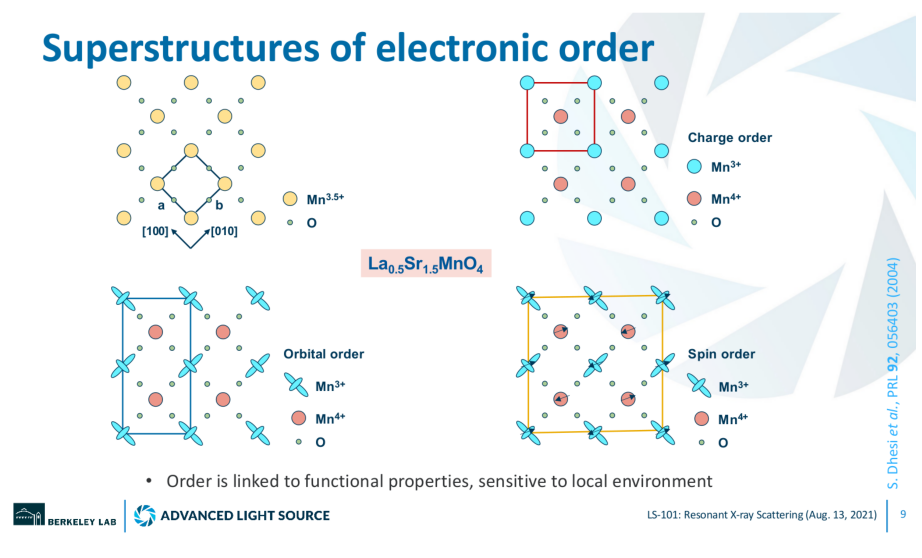

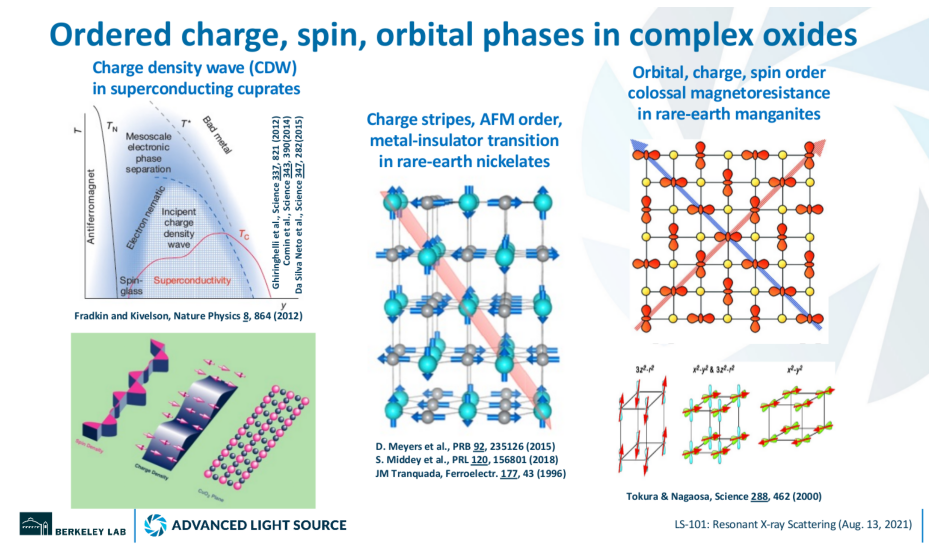

In [3]:
plot_image('/home/beams/29IDUSER/Documents/User_Folders/Staff/Figures/Diffraction.png')
plot_image('/home/beams/29IDUSER/Documents/User_Folders/Staff/Figures/ElectronicOrder.png')
plot_image('/home/beams/29IDUSER/Documents/User_Folders/Staff/Figures/OrbitalOrder.png')

<font color='blue'>All of the beamline functions can be found at:</font>
https://git.aps.anl.gov/rodolakis/Macros_29id/-/tree/master/

In [2]:
%run Macros_29id/ScanFunctions_IEX.py

/home/beams22/29IDUSER/Documents/User_Macros/Macros_29id/ScanFunctions_IEX.py


In [18]:
%run Macros_29id/ScanFunctions_plot.py

/home/beams22/29IDUSER/Documents/User_Macros/Macros_29id/ScanFunctions_plot.py


In [5]:
%run Macros_29id/hklpy/ScanFunctions_hkl.py


fourc modes: ['bissector', 'constant_omega', 'constant_chi', 'constant_phi', 'double_diffraction', 'psi_constant']

selected mode: constant_phi

===== =================== ========== ===== ====
axis  low_limit           high_limit value fit 
===== =================== ========== ===== ====
omega -20.0               150.0      0.0   True
chi   -29.999999999999996 100.0      0.0   True
phi   -180.0              180.0      0.0   True
tth   0.0                 180.0      0.0   True
===== =================== ========== ===== ====




In [6]:
# A few custom function:
# n=scan number, 33/34 = detector number (big/small diode, respectively) 
# 0.1= starting FWHM, fit function = lorz, gauss or erf (error function)

def fit_d4(n):    
    fit_mda(n,34,0.1,'lorz')  

def fit_d3(n):
    fit_mda(n,33,3,'gauss')

def fit_z(n,d=33):
    fit_mda(n,d,500,'erf')
    

In [1]:
Folder_Kappa('NXschool') 

Current run: 2021_2
To create ftp folders & update contrab, you need to run the following as 29id:
	Folder_Kappa('2021_2','NXschool',ftp=True)
Current run: 2021_2
Current run: 2021_2

MDA folder: /net/s29data/export/data_29idd/2021_2/NXschool/mda

SPEC folder: /home/beams22/29IDUSER/spec/data/2021_2/NXschool/
You will need to create folder and set up the path manually in SPEC:
    cd /home/beams22/29IDUSER/spec/data/2021_2/NXschool/
    newfile FileName
To start SPEC fresh: ./bin/kappa29ID -f
06/30/2021: cammented our Folder_MPA(...)

ScanIOC set to: Kappa

Save Status Kappa: Active - saveData OK

Log FileName = '20210727_log.txt' @ 29idb:userStringSeq10.STR3
To change FileName, use logname_set("newname")

REMINDER: Reset_Scan('Kappa'); Reset_CA_all(); Reset_Mono_Limits(); Sync_SmarAct_Motor(); Sync_PI_Motor(); Sync_Euler_Motor()


In [69]:
path='/net/s29data/export/data_29idd/2021_2/NXschool/mda'

In [3]:
Reset_Scan('Kappa'); Reset_CA_all(); Reset_Mono_Limits(); Sync_SmarAct_Motor(); Sync_PI_Motor(); Sync_Euler_Motor()


Resetting 29idKappa:scan1
Scan record reset to default.

Kappa scalers are triggered. Counting time set to 0.1s
Checking if all detectors & positioners are connected...

All the current amplifiers have been reset; ca5 set to passive.
Mono limits have been reset.
SamrAct motors VAL homed
PI motors VAL synced to RBV
Euler motors VAL/RBV synced to physical motors


In [9]:
Get_All(); mprint()   # print current status of the beamline; 
# we start at 500 eV in circular right polarization which is our default settings



 ID SP  : 512.80 eV    ID mode : RCP
 ID RBV : 505.13 eV    QP mode : 100 %
 Mono   : 500.00 eV    GRT : MEG
-----------------------------------------------------------
 Mono Optics: Au_1000 -  Dummy
 MIR Offset : 0.3400     MIR Tx : -12.040
 GRT Offset : 0.7369     GRT Tx : 131.624
 GRT b2 : -7.1860e-05     GRT Density: 1200.0 l/mm
 cff : 2.1007          exit arm: 20000.0 mm
 tun0 : 0.0000e+00     tun1: 0.0000e+00
 tun2 : 0.0000e+00     tun3: 0.0000e+00
-----------------------------------------------------------
 Slit-1A = (1.92x1.8) @ (0.12,-0.13)
 Slit-2B = (2.81x3.3) @ (-0.25,-0.25)
 Slit-3C = 50.0 um
 Slit-3D = 100.0 um @ -270.0 um
-----------------------------------------------------------
 M1 @ 0.650 / -21.500 / 0.000 / 0.000 / 8.575 / 3.000
 M3R @ -2.500 / -0.000 / 0.000 / -13.955 / -16.45004 / -6.000
 => In D branch
-----------------------------------------------------------
ARPES =  [-1.252, -1.002, 13.75, 0.003, 0.0, 0.0]
Kappa =  [-5.6, -0.1, 0.4, -0.0, 108.009, 131.813, 

[-6.0, -0.0, 0.0, -0.0, 108.01, 131.81, 55.16]

# Aligning the sample

<font color='blue'>We have 3 detectors (parenthesis indicate the detector number in scans):
- <font color='blue'>D3 &nbsp;&nbsp; (#33) &nbsp;&nbsp;$\Rightarrow$&nbsp;&nbsp; big photodiode (3 degrees angular acceptance) 
- <font color='blue'>D4 &nbsp;&nbsp; (#34) &nbsp;&nbsp;$\Rightarrow$&nbsp;&nbsp; small photodiode (0.1 angular acceptance)  
- <font color='blue'>MCP (#35) &nbsp;&nbsp;$\Rightarrow$&nbsp;&nbsp; 2D microchannel plate 


<font color='blue'>The MCP is very sensitive and can be damaged when exposed to too many count, so we do the alignment using the photodiodes which have  a large dynamic range. </font>

- <font color='blue'>$tth = 0$ corresponds to direct beam on the detector (defined absolutely)
- <font color='blue'>$th =$ angle between the sample surface and the beam; $th = 0$ corresponds to grazing incidence.

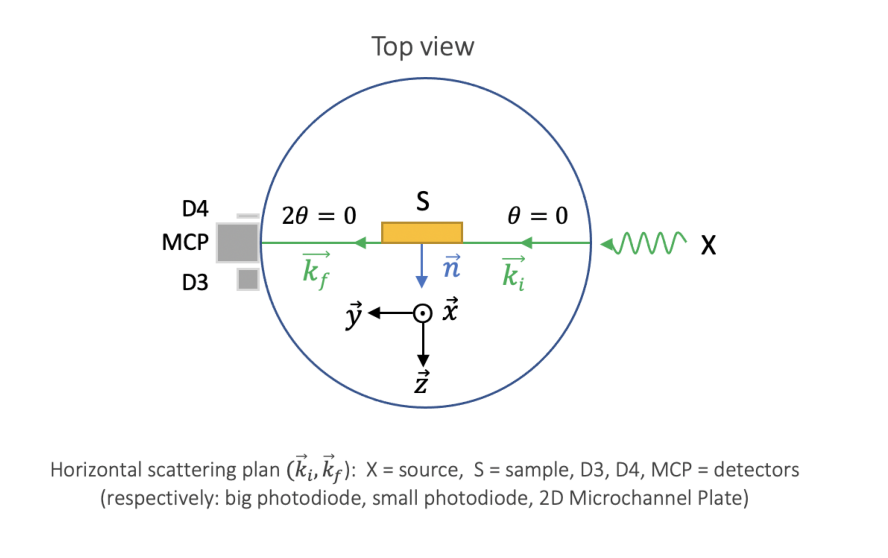

In [58]:
plot_image('/home/beams/29IDUSER/Documents/User_Folders/Staff/Figures/kappa.png')

<font color='blue'>Since $tth = 0$ is defined by the direct beam, we have to define the $tth=0$ for each detector. This is done automatically by using the following function:</font>

In [11]:
setdet('d3')

Detector now set to: d3


<font color='blue'>We can check our $tth=0$ by scanning the direct beam (with the sample out of the way):

In [12]:
scantth(-5,5,0.5)  # start , stop, step

Scan1: 29idKappa:m9.VAL= -5.0 / 5.0 / 0.5
Kappa_1 started at  Tue 27 Jul 2021 13:49:14
Kappa_1 finished at  Tue 27 Jul 2021 13:49:48




/home/beams/29IDUSER/Documents/User_Folders/NXschool/lastfigure.png


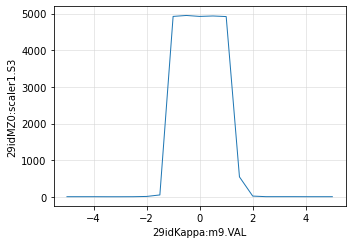

In [13]:
plot_mda(1,33)   # plot scan #1 for detector #33  (big diode)

<font color='blue'>D3 is much bigger than the beam, so a better way to verify $tth=0$ is to scan the direct beam with the small diode:

In [14]:
detset('d4')

Detector now set to: d4


<font color='blue'>This function recalculate the current tth position for a given detector (based on the absolute offset between all 3 detectors); but it does not MOVE tth. To put D4 in direct beam, we need to move it to tth=0; then we can scan the direct beam: </font>

In [15]:
mvtth(0)

tth = 0.001


In [20]:
scantth(-0.25,0.25,0.025)

Scan1: 29idKappa:m9.VAL= -0.25 / 0.25 / 0.025
Kappa_3 started at  Tue 27 Jul 2021 13:55:23
Kappa_3 finished at  Tue 27 Jul 2021 13:55:38




a0 = 120.299

Amplitude:  39158.34097137744
Center:  0.07077552359554651
FWHM:  0.15285053788234348




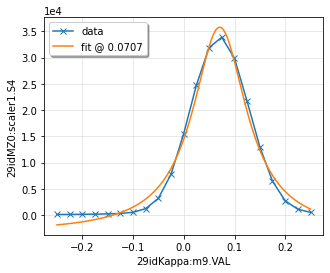

In [21]:
fit_d4(3)  # fit scan #2 with a lorentzian

<font color='blue'>We move tth to the max intensity and reset tth to be 0 at this position:

In [22]:
mvtth(0.0707)

tth = 0.071


In [23]:
tth0_set()

Are you sure you want to reset tth0 (Y or N)? >


 y


tth position reset to 0


<font color='blue'>We can check the beam is now perfectly center to 0:

In [25]:
scantth(-0.25,0.25,0.025)

Scan1: 29idKappa:m9.VAL= -0.25 / 0.25 / 0.025
Kappa_5 started at  Tue 27 Jul 2021 13:57:11
Kappa_5 finished at  Tue 27 Jul 2021 13:57:26




a0 = 120.207

Amplitude:  39378.87271639315
Center:  0.00031304001837008534
FWHM:  0.15673500299341367




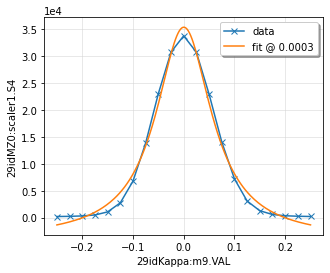

In [26]:
fit_d4(5)

<font color='blue'>Since we know the aboslute offset between D4 and the other 2 detectors, aligning d4 is enough to align all the detectors. We can switch back to the big diode (D3) and start aligning the sample into the beam:

In [27]:
detset('d3')

Detector now set to: d3


### Align z:

<font color='blue'>We can now align the sample into the beam; we start with the z-axis, which is along the sample normal. In grazing incidence (th=tth=0), by moving the sample into the beam, the center of the beam corresponds to half intensity on the detector:

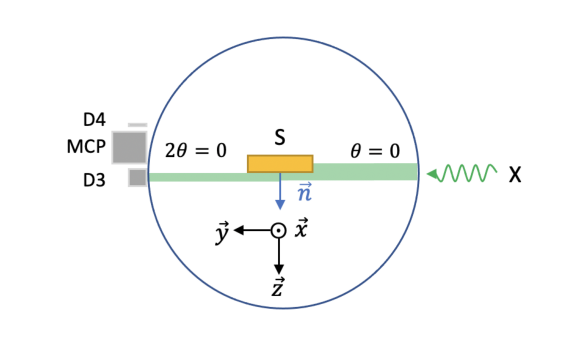

In [64]:
plot_image('/home/beams/29IDUSER/Documents/User_Folders/Staff/Figures/scanz.png',h=10)

In [28]:
dscanz(-750,750,50)  # dscan (start, stop step) = relative scan ( here in microns!)

Scan1: 29idKappa:m4.VAL= 1250.18 / 2750.18 / 50.0
Kappa_6 started at  Tue 27 Jul 2021 14:04:37
Kappa_6 finished at  Tue 27 Jul 2021 14:05:03




a0 = 120.216

Center:  1967.3651562707807
FWHM:  244.94053625131173




1967.3651562707807

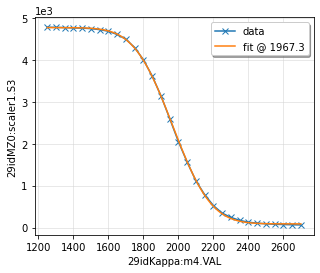

In [35]:
fit_mda(6,33,500,'erf')  # this can be fit with an error function

We go to half intensity:

In [36]:
mvz(1967)

z = 1967.004


### Align th:

<font color='blue'><p>Now we want to make sure the sample is perfectly grazing. Even if we set th to 0, each sample has its own offset with respect to the diffractometer; this depends on how the sample was mounted on the sample plate, etc.
<p>The best way to do so is to go to specular, ie use the sample as a mirror by going to $tth = 2 * th$, which works well for a thin film (can be challenging with single crystals which typically are smaller and have multiple facets). <\p>
<p>Since tth = 0 is absolutely defined by the direct beam, the reflected beam will hit the detector only if:&nbsp; $th + th_0 = tth / 2$, where th and tth are the actual motor positions (th$_0$ is the offset between the surface normal and the diffractometer).<\p>


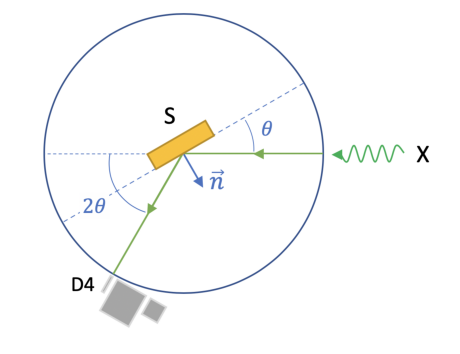

In [41]:
plot_image('/home/beams/29IDUSER/Documents/User_Folders/Staff/Figures/specular.png',h=8)

<font color='blue'><p>The small diode is more accurate for this measurment:

In [37]:
setdet('d4')

Detector now set to: d4


In [38]:
uan(10,5)  # move tth and th simultaneously

tth=10 th=5


In [43]:
dscanth(-0.5,0.5,0.05)   # dscan (start, stop step) = relative scan 

Scanning pseudo motor 29idKappa:Euler_Theta
Scan1: 29idKappa:Euler_Theta= 2.75 / 3.75 / 0.05
Kappa_10 started at  Tue 27 Jul 2021 14:13:07
Kappa_10 finished at  Tue 27 Jul 2021 14:13:31




a0 = 120.462

Amplitude:  17924.99343190811
Center:  3.2055383959530572
FWHM:  0.09939643617320348




3.2055383959530572

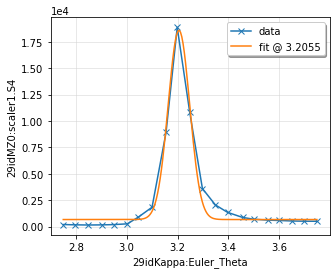

In [44]:
fit_mda(10,34,0.1,'gauss')  # fit scan #10, looking at detector #34 (=D4), FWHM ~ 0.1 

<font color='blue'>We can take smaller steps to get a better fit:

In [47]:
dscanth(-0.25,0.25,0.02)

Scanning pseudo motor 29idKappa:Euler_Theta
Scan1: 29idKappa:Euler_Theta= 2.951 / 3.451 / 0.02
Kappa_12 started at  Tue 27 Jul 2021 14:16:29
Kappa_12 finished at  Tue 27 Jul 2021 14:16:50




a0 = 120.673

Amplitude:  17618.190739381385
Center:  3.208274111103298
FWHM:  0.09739105096421925




3.208274111103298

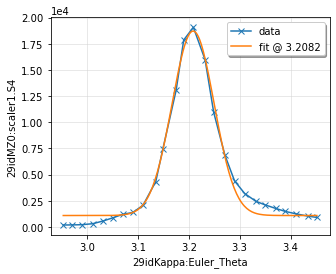

In [49]:
fit_mda(12,34,0.1,'gauss')

<font color='blue'>Which gives us $th_0$:

In [50]:
th0=3.208-5

In [52]:
th0

-1.7919999999999998

### Second iteration:

<font color='blue'>Since the sample was not perfectly grazing when we measured z, so we iterate:

In [54]:
mvth(th0)     # putting the sample back to grazing using the new th0 value

th = -1.795


In [55]:
detset('d3')  # change detector to big diode

Detector now set to: d3


In [56]:
mvtth(0)      # moving D3 back to direct beam

tth = 0.0


In [57]:
dscanz(-750,750,50)

Scan1: 29idKappa:m4.VAL= 1216.723 / 2716.723 / 50.0
Kappa_13 started at  Tue 27 Jul 2021 14:19:54
Kappa_13 finished at  Tue 27 Jul 2021 14:20:20




a0 = 120.091

Center:  2031.0403661654516
FWHM:  238.57571794220107




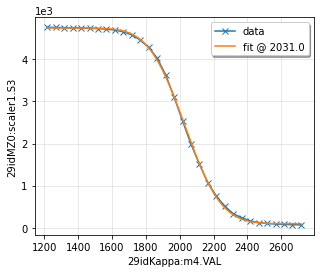

In [58]:
fit_z(13)

In [59]:
mvz(2031)

z = 2030.998


<font color='blue'><p>z at $th = th_0$ is slightly different ($+ 60 \mu m$) 
<font color='blue'><p>Now we iterate over th:

In [64]:
detset('d4')

Detector now set to: d4


In [65]:
uan(10,5+th0)

tth=10 th=3.208


In [67]:
dscanth(-0.25,0.25,0.025)

Scanning pseudo motor 29idKappa:Euler_Theta
Scan1: 29idKappa:Euler_Theta= 2.957 / 3.457 / 0.025
Kappa_16 started at  Tue 27 Jul 2021 14:25:47
Kappa_16 finished at  Tue 27 Jul 2021 14:26:06




a0 = 120.016

Amplitude:  15981.312440035206
Center:  3.1909668138089344
FWHM:  0.11077736027605263




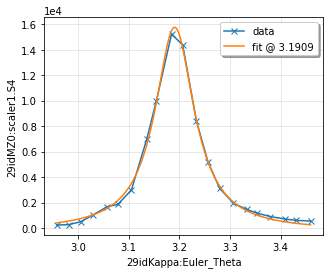

In [69]:
fit_d4(16)

In [70]:
th0=3.19-5
print(th0)

-1.81


In [72]:
mvth(3.19)

th = 3.195


<font color='blue'><p>$th _0$ is unchanged (difference is only 0.01); we can move one. 
<font color='blue'><p>The next step is to check x and y. The sample is relatively big (5x3mm) so we were able to center the beam on the sample just by using a standard camera.

### Align x & y:

<font color='blue'>There are several ways to double check x and y, for example:
- <font color='blue'>go to normal incidence th=90 (ie the sample surface is perpendicular to the beam), and raster the beam in x (up/down) and y (left/right) by looking at the drain current (photoelectric effect). This can be done by taking cuts in x and y or, for small sample, by taking a 2D scan in x/y.
	- <font color='blue'>For conductive sample we can get a better contrast by tuning the energy to an absorption edge for one of the element contained in the sample.
	- <font color='blue'>For insulator, there will be a good contrast no matter the energy since the sample plate is conductive while the sample is not (sample appears as a "hole" in the drain current). 
- <font color='blue'>we can go in specular condition and look at the intesity of the reflected beam on the detector; the sample will give a good signal while the sample plate, which is a very bad mirror, will not. This works well for flat samples but not for facetted sample. 

<font color='blue'>We use the second method here:

### Align x:

In [73]:
scanx(-5000,5000,250)   # absolute x scan 

Scan1: 29idKappa:m2.VAL= -5000.0 / 5000.0 / 250.0
Kappa_17 started at  Tue 27 Jul 2021 14:29:50
Kappa_17 finished at  Tue 27 Jul 2021 14:31:45




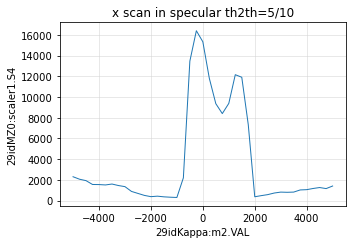

In [5]:
plot_mda(17,34,title='x scan in specular th2th=5/10')

In [74]:
mvx(600)   # we move to the center of the sample

x = 599.992


### Align y:

In [76]:
scany(-5000,5000,250)  # absolute y scan 

Scan1: 29idKappa:m3.VAL= -5000.0 / 5000.0 / 250.0
Kappa_18 started at  Tue 27 Jul 2021 14:32:31
Kappa_18 finished at  Tue 27 Jul 2021 14:34:27




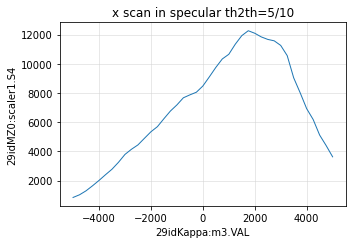

In [4]:
plot_mda(18,34,title='y scan in specular th2th=5/10')

In [78]:
mvy(2000)

y = 1999.997


#### <font color='blue'>Why is the y scan so broad? 
<font color='blue'>The sample size is convoluted with the beam and in the horizontal scattering plan, th footprint of the beam is very big at small angle: the beam horizontal size is about $400\mu m$; the y is the axis along the beam for $th=0$, so at $th=5^{\circ}$, the footprint of the beam is $0.4 / sin(5) = 4.5 mm$

In [57]:
0.4/sin(5*pi/180)

4.589485298267943

### Align chi:
<font color='blue'>Finally we can check chi (tilt of the sample out of the horizontal scattering plane). Our detectors are all at least 10 mm tall, so this does not need to be super accurate. We can do that by looking at specular and rocking chi:

In [83]:
uan(20,10+th0)

tth=20 th=8.19


In [85]:
dscanchi(-5,5,0.5)

Scan1: 29idKappa:Euler_Chi= 83.8 / 93.8 / 0.5
Kappa_21 started at  Tue 27 Jul 2021 14:52:36
Kappa_21 finished at  Tue 27 Jul 2021 14:53:40




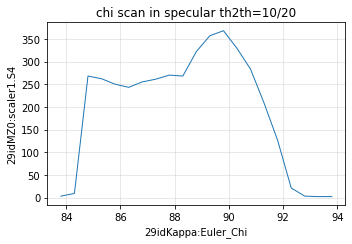

In [6]:
plot_mda(21,34,title='chi scan in specular th2th=10/20')

# Define sample lattice:

<font color='blue'>We are ready to look for Bragg peaks. First we need to "create" a new sample, here $La_{0.7}Ca_{0.3}MnO_3$:

In [8]:
sampleNew('LCMO',5.43,5.43,7.7,90,90,90)  # name, a, b, c, alpha, beta, gamma

HklSample(name='LCMO', lattice=LatticeTuple(a=5.43, b=5.43, c=7.7, alpha=90.0, beta=90.0, gamma=90.0), ux=Parameter(name='None (internally: ux)', limits=(min=-180.0, max=180.0), value=0.0, fit=True, inverted=False, units='Degree'), uy=Parameter(name='None (internally: uy)', limits=(min=-180.0, max=180.0), value=0.0, fit=True, inverted=False, units='Degree'), uz=Parameter(name='None (internally: uz)', limits=(min=-180.0, max=180.0), value=0.0, fit=True, inverted=False, units='Degree'), U=array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), UB=array([[ 1.15712437e+00, -7.08534325e-17, -4.99654726e-17],
       [ 0.00000000e+00,  1.15712437e+00, -4.99654726e-17],
       [ 0.00000000e+00,  0.00000000e+00,  8.15998092e-01]]), reflections=[], reflection_measured_angles=array([], shape=(0, 0), dtype=float64), reflection_theoretical_angles=array([], shape=(0, 0), dtype=float64)))


# Define initial UB matrix:

<font color='blue'>According to the sample grower, our sample is align as follow:

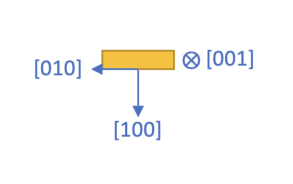

In [21]:
plot_image('/home/beams/29IDUSER/Documents/User_Folders/Staff/Figures/sample.png',h=5)

## Reflection 1:

<font color='blue'>The easiest reflection to define is what is called "out of plane" (ie sample normal), here [100]. 
To probe this direction, we just need to align the q vector along the sample normal, ie $tth = 2 * th$:
- <font color='blue'>$tth = 0$ corresponds to direct beam on the detector (defined absolutely)
- <font color='blue'>$th =$ angle between the sample surface and the beam; $th = 0$ corresponds to grazing incidence.

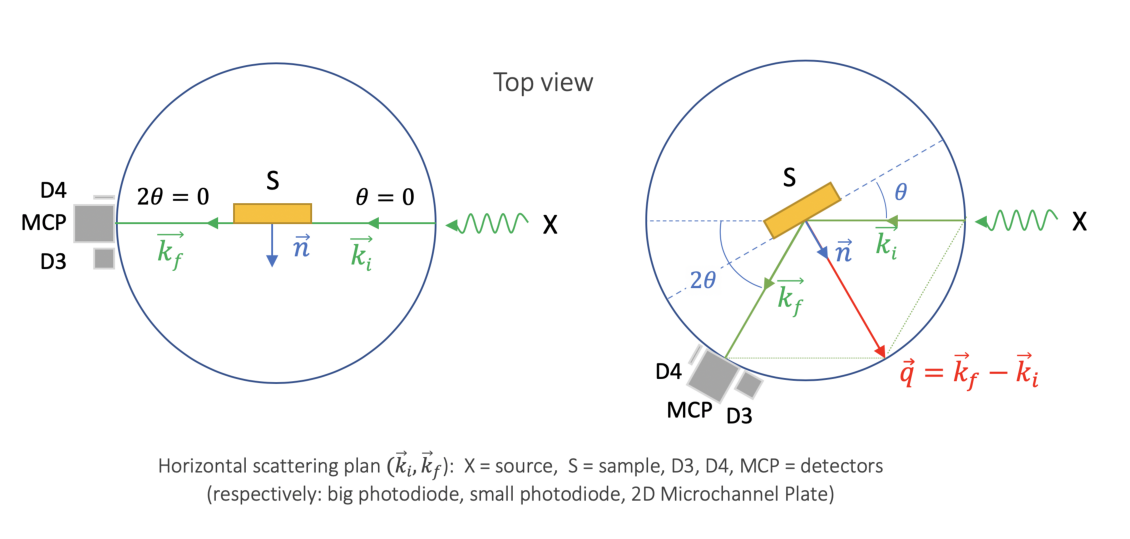

In [30]:
plot_image('/home/beams/29IDUSER/Documents/User_Folders/Staff/Figures/reflection1.png')

<font color='blue'>To satisfy Bragg's law, we need to match the energy with the lattice parameter (distance between 2 crystallographic planes $d$). 


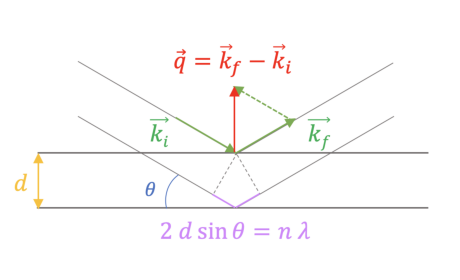

In [65]:
plot_image('/home/beams/29IDUSER/Documents/User_Folders/Staff/Figures/BraggLaw.png', h=8)

<font color='blue'> This requires to work at high enough energy (see Ewald's sphere construction: https://en.wikipedia.org/wiki/Ewald%27s_sphere for more details):


In [86]:
energy(2850)

ID Ready

ID SET : 2953.0 eV
ID RBV : 2952.1 eV
Down Table
Mono set to 2850 eV


Mono set to 2850 eV

align_m3r()
Starting...
Done
(position, sigma, total intensity, integration time (s), mirror pitch):
(135.9, 6.64, 31805.0, 0.03, -16.4465)


Starting...
Done
(position, sigma, total intensity, integration time (s), mirror pitch):
(119.26, 6.7, 28111.0, 0.03, -16.4636)




<font color='blue'> Our sample normal has a -1.81 degree offset (th0) with respect to the diffractometer (e.g. glue under the sample, burr on the sample plate), which we need to take into acount in order to align our sample normal to the q vector:

In [114]:
uan(80,40+th0)  # uan(tth,th) moves th and tth simultaneously; here th = tth/2+th0

tth=80 th=38.19


<font color='blue'> We define a reflection (r1) for the current motor positions; (100) is forbiden, we use (200) instead: 

In [115]:
r1=setor(2,0,0)  # setor(h,k,l) defines a reflection using the current motor positions

tth=80.000, omega=38.190, chi=88.800, phi=0.000


<font color='blue'> We need a second reflection in order to  fully define the UB matrix.This can be done many different ways:
- <font color='blue'> If we move away from the th2th condition by moving the sample to th+delta while tth (detector) is kept fixed, we have a contribution from an in-plane axis (in our case, [010]): for th+delta, q is now along [1-delta, delta, 0] (left figure). 
- <font color='blue'> by going to th = 120 and tth = th/2, q is along [0,1,0] (right figure)

<font color='blue'> <p>Note that the actual values of the miller indexes do not matter at this point; it can be refined later. Besides, we will be working along the out-of-plane direction for the rest of this experiment so the in-plane alignment is secondary.

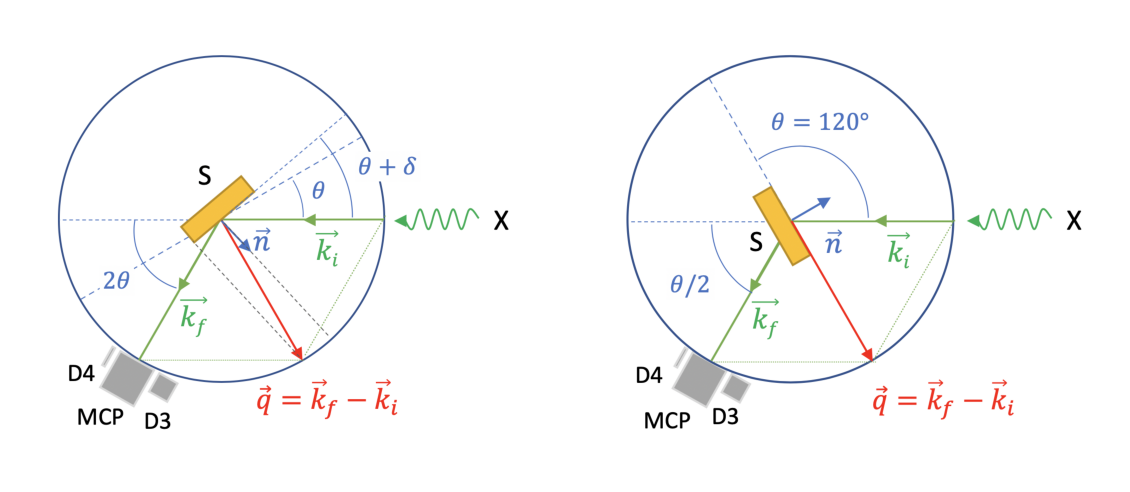

In [31]:
plot_image('/home/beams/29IDUSER/Documents/User_Folders/Staff/Figures/reflection2.png')

In [34]:
r1=setor(2,0,0,38.19,80,88,0) 

tth=38.190, omega=80.000, chi=88.000, phi=0.000


In [35]:
r2=setor(0,2,0,60,120,88,0)   # we define this new position as hkl=(2,2,0)

tth=60.000, omega=120.000, chi=88.000, phi=0.000


In [37]:
UBcalc(r1,r2)        # compute UB matric using the 2 reflections we have defined


UB Matrix forLCMO:
[[ 1.01111223e+00  5.62662285e-01 -7.10564275e-17]
 [ 5.62319526e-01 -1.01049629e+00  2.84779227e-02]
 [ 1.96366305e-02 -3.52873081e-02 -8.15501008e-01]]



array([[ 1.01111223e+00,  5.62662285e-01, -7.10564275e-17],
       [ 5.62319526e-01, -1.01049629e+00,  2.84779227e-02],
       [ 1.96366305e-02, -3.52873081e-02, -8.15501008e-01]])

<font color='blue'> The "where" function gives a snapshot of where everything is, in real space and reciprocal space (based on the current position of the motors and energy of the beamline)

In [119]:
wh()  

LAMBDA = 4.350 	hv = 2849.954
Sync to motor:
omega = 36.99978  	chi = 88.80012  	phi = 0.00001
tth = 79.99970  	kth = 92.25599  	kap = 131.94400  	kphi = 55.25622
Calculating Kappa angles using kth0 = 57.045
===================== ======================
term                  value                 
===================== ======================
diffractometer        fourc                 
Sample                LCMO                  
a                     5.43                  
b                     5.43                  
c                     7.7                   
wavelength (angstrom) 4.350393146474888     
energy (eV)           2849.953919692616     
h                     1.604256411568741     
k                     0.033324264813703756  
l                     1.5184151818638708e-12
omega                 36.99977609685484     
chi                   88.80011730447826     
phi                   1.0183568284702227e-05
tth                   79.99970000000002     
kth                   92.25

# Navigating in reciprocal space:

<font color='blue'> We can now calculate the position of the motors for any given hkl:

In [121]:
cahkl(2,0,0)   # calculate the motor position for a given hkl; the 

Calculating Kappa angles using kth0 = 57.045
Sample = LCMO 
Lattice = 5.430,5.430,7.700 
LAMBDA = 4.350 	hv = 2849.954
Mode = constant_phi


(51.43261, 88.80012, 1e-05, 106.48536, 106.689, 131.944, 55.256)

<font color='blue'> This is a coarse estimation (all we did so far was to align q along the sample normal), but we can easily refine the position by looking at the image on the MCP then tweak the motors to center the beam on the detector:

In [126]:
setdet('mcp')

Detector now set to: mcp


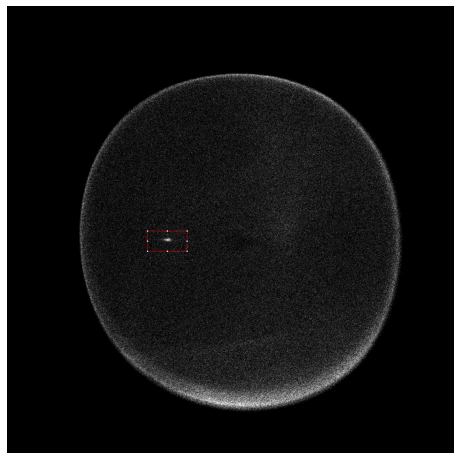

In [67]:
plot_image('/home/beams/29IDUSER/Documents/User_Folders/Staff/Screenshots/h68p57_tth135p155_hv951p5.png',h=8)

In [124]:
uan(106.5,52.4)  # centers the beam on the MCP

tth=106.5 th=52.4


<font color='blue'> Since we only aligned coarsely, we are most likely just catching the tail of the Bragg peak. A Bragg reflection give a lot of signal so we switch back to the big diode:

In [127]:
setdet('d3')

Detector now set to: d3


In [128]:
mvtth(108.6)

tth = 108.6


<font color='blue'> We rock theta while maintaining tth so that the peak is centered on the detector:

In [129]:
dscanth(-1,1,0.05)

Scanning pseudo motor 29idKappa:Euler_Theta
Scan1: 29idKappa:Euler_Theta= 51.4 / 53.4 / 0.05
Kappa_22 started at  Tue 27 Jul 2021 15:34:50
Kappa_22 finished at  Tue 27 Jul 2021 15:35:27




/home/beams/29IDUSER/Documents/User_Folders/NXschool/lastfigure.png


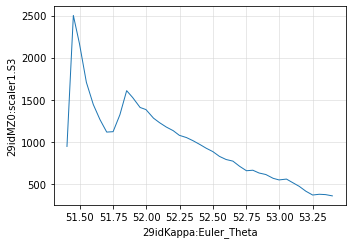

In [130]:
plot_mda(22,33) 

<font color='blue'> We scan a bit lower in th:

In [131]:
dscanth(-3,-1,0.05)

Scanning pseudo motor 29idKappa:Euler_Theta
Scan1: 29idKappa:Euler_Theta= 49.4 / 51.4 / 0.05
Kappa_23 started at  Tue 27 Jul 2021 15:36:26
Kappa_23 finished at  Tue 27 Jul 2021 15:37:04




/home/beams/29IDUSER/Documents/User_Folders/Stoica/lastfigure.png


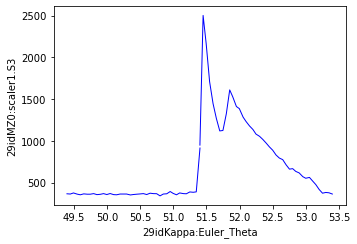

In [70]:
plot_mda(22,33,23,33, color='b', filepath=path,prefix='Kappa_')

<font color='blue'> Moving th to the maximum intensity:

In [133]:
mvth(51.5)

th = 51.504


<font color='blue'> We are now sufficiently close to start scanning in hkl. Let start with scanning from (1.9,0,0) to (2,0,0): 

In [139]:
scanhkl((1.9,0,0),(2.1,0,0),51,ct=1) # hkl_start, hkl_stop, number of point, acquisition time


Current energy: 2849.95
Number of accessible reflections:  52
Integration time set to: 1
<H> = [D46]
<K> = [D47]
<L> = [D48]
tth = [D54]
  = [D55]
 = [D56]
 = [D57]
Scan1: 29idKappa:m9.VAL= 0.0 / 0.0 / 0.0
Kappa_26 started at  Tue 27 Jul 2021 15:46:30
Kappa_26 finished at  Tue 27 Jul 2021 15:48:13



All extra positionners cleared


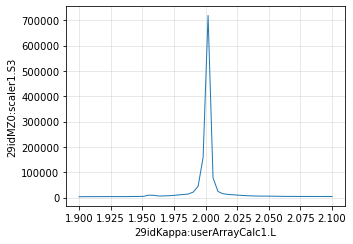

In [12]:
plot_mda(24,33,vs_det=46,filepath=path,prefix='Kappa',save=False)

<font color='blue'> Let zoom in: 

In [139]:
scanhkl((1.95,0,0),(2.01,0,0),51,ct=1) 


Current energy: 2849.95
Number of accessible reflections:  52
Integration time set to: 1
<H> = [D46]
<K> = [D47]
<L> = [D48]
tth = [D54]
  = [D55]
 = [D56]
 = [D57]
Scan1: 29idKappa:m9.VAL= 0.0 / 0.0 / 0.0
Kappa_26 started at  Tue 27 Jul 2021 15:46:30
Kappa_26 finished at  Tue 27 Jul 2021 15:48:13



All extra positionners cleared


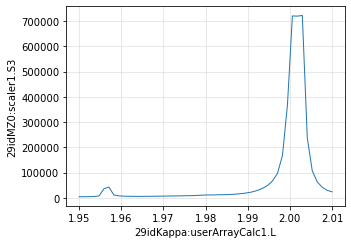

In [13]:
plot_mda(26,33,vs_det=46,filepath=path,prefix='Kappa',save=False)

<font color='blue'> The diode is saturating (Bragg peaks are very strong); we adjust the gain: 

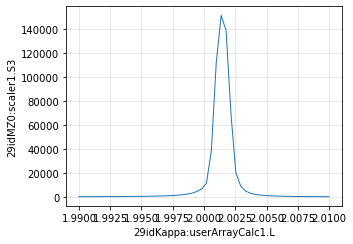

In [76]:
plot_mda(27,33,vs_det=46)

In [144]:
mvth(51.5)

th = 51.5


In [145]:
mvtth(106.6)

tth = 106.599


In [146]:
scanhkl((1.99,0,0),(2.01,0,0),51,ct=1) 


Current energy: 2849.99
Number of accessible reflections:  52
Integration time set to: 1
<H> = [D46]
<K> = [D47]
<L> = [D48]
tth = [D54]
  = [D55]
 = [D56]
 = [D57]
Scan1: 29idKappa:m9.VAL= 0.0 / 0.0 / 0.0
Kappa_27 started at  Tue 27 Jul 2021 15:52:40
Kappa_27 finished at  Tue 27 Jul 2021 15:54:11



All extra positionners cleared


Amplitude:  962119.4905293721
Center:  2.0011564734389253
FWHM:  0.0032155301978673777




2.0011564734389253

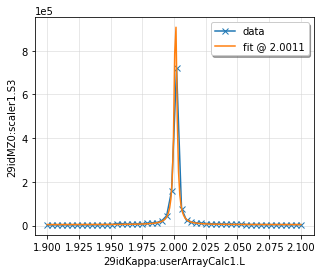

In [51]:
fit_mda(24,33,0.0001,'lorz','H',filepath=path,prefix='Kappa_')

<font color='blue'> Our Bragg peak is resonably centered at (2,0,0); we can extract the corresponding motor position to refine our UB matrix:

Amplitude:  956983.1664632442
Center:  106.57372905487838
FWHM:  -0.24795625000545865




106.57372905487838

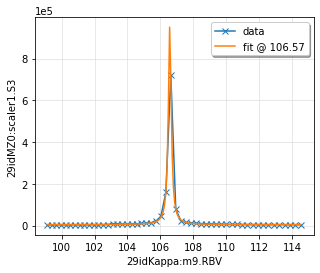

In [49]:
fit_mda(24,33,1,'lorz','tth',filepath=path,prefix='Kappa_')

Amplitude:  949311.2170990376
Center:  51.47765757272533
FWHM:  -0.12363409890061101




51.47765757272533

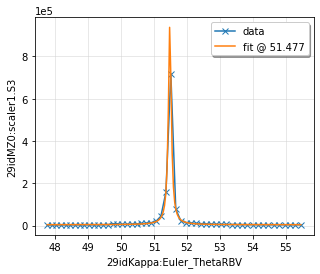

In [50]:
fit_mda(24,33,1,'lorz','th',filepath=path,prefix='Kappa_')

<font color='blue'> We move to the corresponding motor position and redefine our 1st reflection and recalculate the UB matrix:

In [150]:
mvth(51.485)

th = 51.489


In [152]:
mvtth(106.596)

tth = 106.596


In [10]:
r1=setor(2,0,0) # refine r1

tth=106.596, omega=51.485, chi=88.700, phi=0.000


In [13]:
UBcalc(r1,r2)   # 


UB Matrix forLCMO:
[[-3.66128024e-02 -1.15654498e+00 -1.83739257e-08]
 [ 1.15624728e+00 -3.66033772e-02 -1.85135437e-02]
 [ 2.62399455e-02 -8.30705326e-04  8.15788045e-01]]

LAMBDA = 19.222 	hv = 644.998
Sync to motor:
omega = 49.99983  	chi = 88.69996  	phi = 0.00018
tth = 106.59610  	kth = 105.11199  	kap = 131.71500  	kphi = 55.11234


array([[-3.66128024e-02, -1.15654498e+00, -1.83739257e-08],
       [ 1.15624728e+00, -3.66033772e-02, -1.85135437e-02],
       [ 2.62399455e-02, -8.30705326e-04,  8.15788045e-01]])

<font color='blue'> We are now perfectly align on the (2,0,0):

In [161]:
wh()

LAMBDA = 4.350 	hv = 2849.959
Sync to motor:
omega = 51.48483  	chi = 88.69996  	phi = 0.00032
tth = 106.59610  	kth = 106.59699  	kap = 131.71500  	kphi = 55.11248
Calculating Kappa angles using kth0 = 57.045
===================== =======================
term                  value                  
===================== =======================
diffractometer        fourc                  
Sample                LCMO                   
a                     5.43                   
b                     5.43                   
c                     7.7                    
wavelength (angstrom) 4.350384657744499      
energy (eV)           2849.9594806929294     
h                     2.001446605114393      
k                     1.1270021960968891e-07 
l                     -2.2281850186939006e-07
omega                 51.48483210423717      
chi                   88.69996056606675      
phi                   0.0003214309506084944  
tth                   106.59610000000002     
kth     

# Resonance:

<font color='blue'> In order to measure long range ordering with element specificity (magnetic, orbital or charge ordering), we need to go at the resonance, here the Mn L-edges (L2 = 650 eV, L3 = 639 eV):

In [4]:
energy(645)  # We set our energy right in between the 2 edges

ID Ready

ID SET : 658.7 eV
ID RBV : 653.5 eV
Down Table
Mono set to 645 eV


Mono set to 645 eV

align_m3r()
Starting...
Done
(position, sigma, total intensity, integration time (s), mirror pitch):
(119.02, 8.99, 107333.0, 0.001, -16.451)




<font color='blue'> We scan the energy:

In [5]:
scanhv(620,670,0.25)   # start, stop, step

Scan1: 29idmono:ENERGY_SP= 620.0 / 670.0 / 0.25
Kappa_28 started at  Tue 27 Jul 2021 16:09:39
Kappa_28 finished at  Tue 27 Jul 2021 16:16:24


Mono set to 645.0 eV


<font color='blue'> Raw spectrum:
- <font color='blue'>blue is the drain current (Total Electron Yield or TEY)
- <font color='blue'>orange is the I0 (monitor)

/home/beams/29IDUSER/Documents/User_Folders/NXschool/lastfigure.png


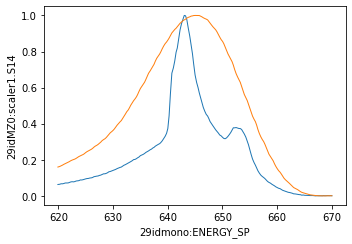

In [7]:
plot_mda(28,32,28,31,norm=1)   

<font color='blue'> Normalized spectrum (TEY/I0):

/home/beams/29IDUSER/Documents/User_Folders/NXschool/lastfigure.png


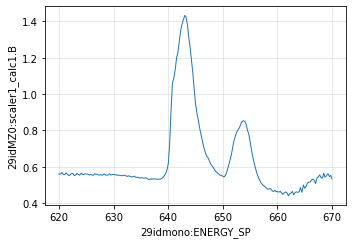

In [8]:
plot_mda(28,36)  

<font color='blue'> With cooling, we would then go to the resonant energy (640.5 eV) and look for the orbital peak located at (0.5,0,0):

In [15]:
cahkl(0.5,0,0)  #

Calculating Kappa angles using kth0 = 57.045
Sample = LCMO 
Lattice = 5.430,5.430,7.700 
LAMBDA = 19.222 	hv = 644.998
Mode = constant_phi


(60.43961, 88.69995, 0.00018, 124.50566, 115.552, 131.715, 55.112)

In [47]:
%run Macros_29id/ScanFunctions_plot.py

/home/beams22/29IDUSER/Documents/User_Macros/Macros_29id/ScanFunctions_plot.py
